## Population and area analysis

Calculate the correlation between area and population

In [2]:
# load libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# load population data
pop = pd.read_csv('data/pop_data/danang_pop.csv')
# load urban area data
area = pd.read_json('data/danang_area.json').rename(columns = {0: 'year', 1: 'urban_area'})

# merge data
danang_data = pop.merge(area, how = 'inner', on = 'year')
danang_all = pop.merge(area, how = 'left', on = 'year')

In [4]:
# linear regression

model = sm.OLS(danang_data['urban_area'], sm.add_constant(danang_data['population'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_area   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1746.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           6.15e-21
Time:                        23:33:52   Log-Likelihood:                -41.723
No. Observations:                  22   AIC:                             87.45
Df Residuals:                      20   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2280      1.722     29.174      0.0

In [5]:
a = model.params['population']
b = model.params['const']

danang_all['prediction'] = a * danang_all['population'] + b

danang_all

,year,population,urban_area,prediction
0,2000,568000,NaN,96.390547
1,2001,588000,96.136798,98.015987
2,2002,609000,97.880764,99.722699
3,2003,631000,98.877313,101.510683
4,2004,653000,101.119545,103.298667
5,2005,676000,103.610906,105.167924
6,2006,700000,108.841795,107.118452
7,2007,725000,111.831442,109.150252
8,2008,751000,113.077126,111.263324
9,2009,778000,114.647174,113.457668


In [6]:
# extract the years annotating
years = danang_all[danang_all['year'].isin([2001, 2010, 2022, 2023, 2030, 2035])]

years

,year,population,urban_area,prediction
1,2001,588000,96.136798,98.015987
10,2010,805000,116.391127,115.652013
22,2022,1188000,144.376490,146.779192
23,2023,1221000,NaN,149.461168
30,2030,1449000,NaN,167.991186
35,2035,1603000,NaN,180.507076


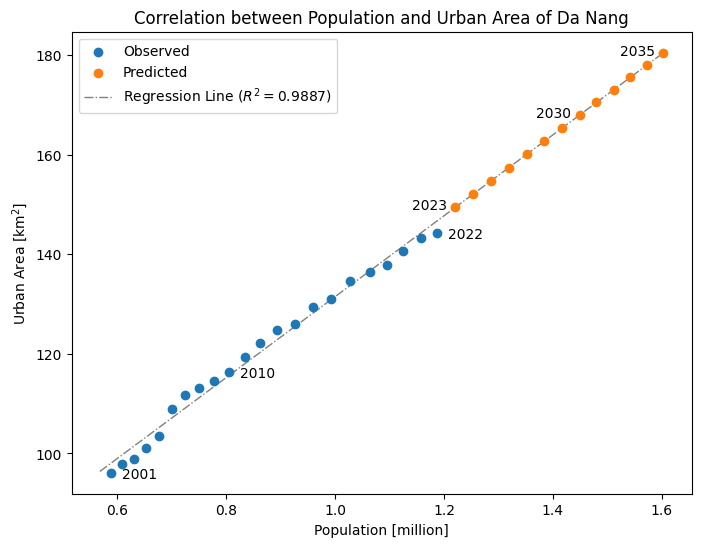

In [8]:
# plot the relationship


# initiate plot
f, ax = plt.subplots(1, 1, figsize = (8, 6))

# add observed points
ax.scatter(
    x = danang_data['population'] / 1000000,
    y = danang_data['urban_area'],
    label = 'Observed',
    zorder = 3
)

# add predicted points
ax.scatter(
    x = danang_all[danang_all['year'] >= 2023]['population'] / 1000000,
    y = danang_all[danang_all['year'] >= 2023]['prediction'],
    label = 'Predicted',
    zorder = 3
)

# add regression line
ax.plot(
    danang_all['population'] / 1000000,
    danang_all['prediction'],
    color = 'gray',
    linewidth = 1,
    linestyle = '-.',
    zorder = 1,
    label = f'Regression Line ($R^2 = {model.rsquared:.4f}$)'
)

# annotate years
for idx, row in danang_all[danang_all['year'].isin([2001, 2010, 2022])].iterrows():
    ax.text(
        x = row['population'] / 1000000 + 0.02, 
        y = row['urban_area'] - 1.2,
        s = int(row['year'])
    )

for idx, row in danang_all[danang_all['year'].isin([2023, 2030, 2035])].iterrows():
    ax.text(
        x = row['population'] / 1000000 - 0.08, 
        y = row['prediction'] - 0.5,
        s = int(row['year'])
    )

# show legend
ax.legend()

# set labels and title
ax.set_xlabel('Population [million]')
ax.set_ylabel(r'Urban Area [$\text{km}^2$]')
ax.set_title('Correlation between Population and Urban Area of Da Nang')

plt.savefig('img/urban_area_comparison.png', bbox_inches = 'tight')
